<a href="https://colab.research.google.com/github/Pacifier25/ZTM-Tensorflow-course/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover pattern in visual data such as camera on self driving car recognizing the car in front 


## Get the data

The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes. https://www.kaggle.com/dansbecker/food-101

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

🔑 **Note**:We start with smaller dataset so we can experiment quickly and figure what works(or better yet what doesn't work) before scalling up

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close() 

--2021-05-14 19:02:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   148MB/s    in 0.7s    

2021-05-14 19:02:33 (148 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



# Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data you're working with.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 2 directories and 1 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 0 directories and 250 images in pizza_steak/test/pizza.


In [ ]:
!ls -la  pizza_steak

total 24
drwxr-xr-x 4 root root 4096 May 14 16:50 .
drwxr-xr-x 1 root root 4096 May 14 19:02 ..
-rw-r--r-- 1 root root 6148 May 14 19:02 .DS_Store
drwxr-xr-x 4 root root 4096 May 14 16:50 test
drwxr-xr-x 4 root root 4096 May 14 16:50 train


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images,first let's get the name programmatically

In [ ]:
import numpy as np
import pathlib

data_dr = pathlib.Path("pizza_steak/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dr.glob('*')]))  # created a list of class_names from the subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # Setup target directory (we'll view images from here)
   target_folder = target_dir + target_class

   # Get a random image path
   random_image = random.sample(os.listdir(target_folder),1)
   # Read in the image and plot it using matplotlib
   img = mpimg.imread(target_folder + "/"+ random_image[0] )
   plt.imshow(img)
   plt.title(target_class)
   plt.axis("off");

   print(f"Image shape {img.shape}")
   return img


Image shape (382, 512, 3)


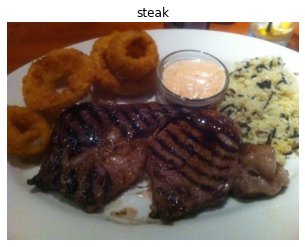

In [ ]:
# View a random image from the training dataset
image = view_random_image(target_dir="pizza_steak/train/",
                          target_class = "steak")

In [ ]:
# View the image shape
image.shape # returns (width, height, colour channels)

(382, 512, 3)

🔑 **Note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [ ]:
import tensorflow as tf
tf.constant(image)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 98,  33,  11],
        [ 93,  28,   6],
        [ 90,  28,   5],
        ...,
        [193, 143,  92],
        [192, 141,  86],
        [181, 130,  73]],

       [[ 96,  31,  11],
        [ 92,  30,   9],
        [ 92,  30,   9],
        ...,
        [197, 146,  93],
        [198, 147,  90],
        [193, 141,  84]],

       [[ 95,  30,  10],
        [ 93,  31,  10],
        [ 94,  32,  11],
        ...,
        [194, 141,  87],
        [197, 142,  85],
        [194, 138,  79]],

       ...,

       [[150, 143, 125],
        [153, 146, 128],
        [150, 143, 125],
        ...,
        [173, 167, 143],
        [181, 173, 150],
        [176, 169, 143]],

       [[150, 143, 124],
        [151, 144, 125],
        [148, 141, 123],
        ...,
        [172, 165, 139],
        [179, 172, 144],
        [172, 165, 137]],

       [[149, 142, 123],
        [149, 142, 123],
        [145, 138, 120],
        ...,
        [171, 164, 13

In [ ]:
# Get all the pixel values between 0 & 1
image/255.

array([[[0.38431373, 0.12941176, 0.04313725],
        [0.36470588, 0.10980392, 0.02352941],
        [0.35294118, 0.10980392, 0.01960784],
        ...,
        [0.75686275, 0.56078431, 0.36078431],
        [0.75294118, 0.55294118, 0.3372549 ],
        [0.70980392, 0.50980392, 0.28627451]],

       [[0.37647059, 0.12156863, 0.04313725],
        [0.36078431, 0.11764706, 0.03529412],
        [0.36078431, 0.11764706, 0.03529412],
        ...,
        [0.77254902, 0.57254902, 0.36470588],
        [0.77647059, 0.57647059, 0.35294118],
        [0.75686275, 0.55294118, 0.32941176]],

       [[0.37254902, 0.11764706, 0.03921569],
        [0.36470588, 0.12156863, 0.03921569],
        [0.36862745, 0.1254902 , 0.04313725],
        ...,
        [0.76078431, 0.55294118, 0.34117647],
        [0.77254902, 0.55686275, 0.33333333],
        [0.76078431, 0.54117647, 0.30980392]],

       ...,

       [[0.58823529, 0.56078431, 0.49019608],
        [0.6       , 0.57254902, 0.50196078],
        [0.58823529, 0

# An end-to-end example

Let's build a convolutional neural network to find pattern in our images,more specifically we need a way to do it

* Load our images
* Preprocess our images
* Build a cnn to to find pattern in our images
* Compile our CNN
* Fit the Cnn to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the random seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32, # number of images to process at a time 
                                               target_size = (224,224),# convert all images to be 224 x 224
                                               class_mode = "binary",# type of problem we're working on
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters = 10,
                             kernel_size = 3,
                             activation = tf.keras.activations.relu,
                             input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3, activation = tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(pool_size = 2,
                                  padding = "valid"),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)

])

model_1.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 0.6283 - accuracy: 0.6290 - val_loss: 0.4790 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4835 - accuracy: 0.7895 - val_loss: 0.3637 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3849 - accuracy: 0.8293 - val_loss: 0.3224 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3326 - accuracy: 0.8552 - val_loss: 0.3334 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3471 - accuracy: 0.8473 - val_loss: 0.3401 - val_accuracy: 0.8440


🤔 **Note**: If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

# Using the same model as before

Let's replicate the model we have build in a previous section to see if it works with image data

The model we are building is from tensorflow playground
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.09947&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

In [ ]:
len(train_data)

47

In [ ]:
# Set the radnom seed
tf.random.set_seed(42)

# Build the modell
model_2 = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape = (224,224,3)),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(4,activation = tf.keras.activations.relu),
              tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

model_2.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 3.7014 - accuracy: 0.4959 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6933 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6931 - accuracy: 0.5044 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6935 - accuracy: 0.4896 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20X more parameters than our CNN (model_1),model_2 performs terribly.. let's try to improve..

🔑 **Note**: Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
# Create the model
model_3 = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape = (224,224,3)),
           tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
           tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
           tf.keras.layers.Dense(100,activation = tf.keras.activations.relu),
           tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
])

model_3.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 182ms/step - loss: 6.9186 - accuracy: 0.5428 - val_loss: 0.7015 - val_accuracy: 0.5880
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.7177 - accuracy: 0.7237 - val_loss: 1.0888 - val_accuracy: 0.5640
Epoch 3/5
47/47 [==============================] - 8s 176ms/step - loss: 0.8374 - accuracy: 0.7017 - val_loss: 0.7276 - val_accuracy: 0.6880
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6174 - accuracy: 0.7367 - val_loss: 0.7142 - val_accuracy: 0.6840
Epoch 5/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4736 - accuracy: 0.7804 - val_loss: 0.5088 - val_accuracy: 0.7880


🔑 **Note**: You can think of trainable parameters as patterns a model can learn from data. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

# Binary classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

# 1.Become one with the data

Image shape (512, 512, 3)
Image shape (512, 512, 3)


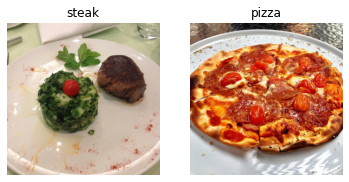

In [ ]:
# Visualize data (requires function 'view_random_image' above)
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

# 2.Preprocess the data (prepare it for a model)

In [ ]:
# # Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

Our next step is to turn our data into **batches**

A batch is a small subset of data Rather than took all the 10,000 images at on time a model might look 32 at a time

It does this for couple of reason:
 1. 10,000 images might not fit into memory of your processor(GPU)
 2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being able to learn well

 

In [ ]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,# target directory of images
                                               target_size = (224,224),# target size of images
                                               class_mode = 'binary',# type of data you are working with
                                               batch_size = 32)#size of min_batches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)


(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

# 3.Create a model (start with a baseline)

A baseline is a simple method or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline

🔑 **Note**: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential



In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters = 10,
                        kernel_size = 3,
                        strides = 1,
                        padding = "valid",
                        input_shape = (224,224,3)),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        Flatten(),
        tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
                        
])

In [ ]:
# Compile the model
model_4.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# 4.Fit a model

In [ ]:
len(train_data),len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 2.3552 - accuracy: 0.6008 - val_loss: 0.4519 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 9s 191ms/step - loss: 0.4251 - accuracy: 0.8215 - val_loss: 0.3966 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3246 - accuracy: 0.8745 - val_loss: 0.4384 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.2097 - accuracy: 0.9287 - val_loss: 0.4068 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.0902 - accuracy: 0.9766 - val_loss: 0.4679 - val_accuracy: 0.7980


In [ ]:
model_1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [ ]:
model_4.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_11 (Flatten)         (None, 475240)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# 5.Evaluate the model
It's look like our model is learning something let's evaluate

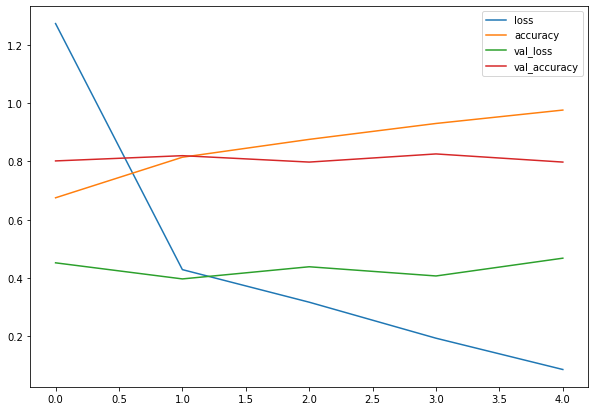

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7));

🔑 **Note**: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curve(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

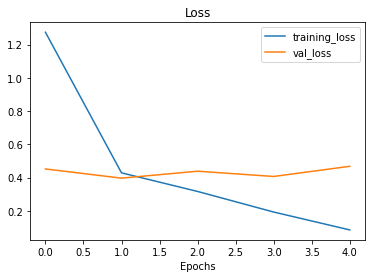

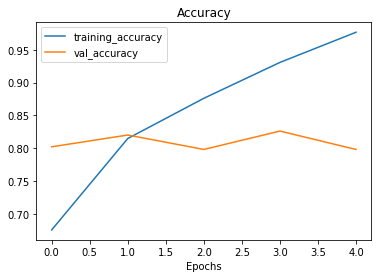

In [ ]:
# Check out the loss curves of model_4
plot_loss_curve(history_4)

# 6.Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a basline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

And there are even a few more things we could try to further overfit our model:

* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

Reduce overfitting:

* Add data augmentation
* Add data regularization layers(MaxPool2D)
* Add more...

> **Note**: Reducing overfiting is also known regularization


In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)

model_5 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu,input_shape = (224,224,3)),
        MaxPool2D(pool_size=2),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        MaxPool2D(),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        MaxPool2D(),
        Flatten(),
        Dense(1,activation = tf.keras.activations.sigmoid)
])


In [ ]:
model_5.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 190ms/step - loss: 0.6686 - accuracy: 0.5687 - val_loss: 0.5322 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.5164 - accuracy: 0.7549 - val_loss: 0.4189 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 8s 181ms/step - loss: 0.4419 - accuracy: 0.8033 - val_loss: 0.3912 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4489 - accuracy: 0.8040 - val_loss: 0.3480 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.3811 - accuracy: 0.8338 - val_loss: 0.3386 - val_accuracy: 0.8760


In [ ]:
model_5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6760)            

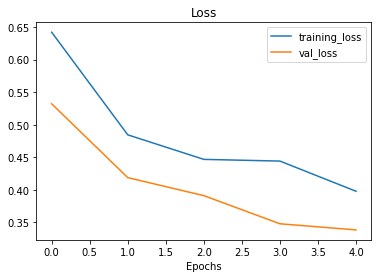

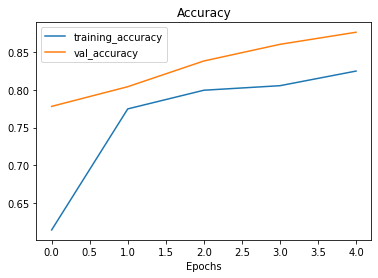

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curve(history_5)

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2, # rotate the image slightly
                                          shear_range = 0.2, # shear the image
                                          zoom_range = 0.2, # zoom into the image
                                          width_shift_range = 0.2, # shift the image width ways
                                          height_shift_range = 0.2, # shift the image height ways
                                          horizontal_flip = True)  # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

>🤔 **Question**: What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


🔑 **Note**: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'binary',
                                                                   shuffle = False)  # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("non augmented data")

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size = (224,224),
                                              batch_size = 32,
                                              class_mode = 'binary',
                                              shuffle = False)

# Create non augmenteed test data 

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary',
                                             shuffle = False)

Augmented training data
Found 1500 images belonging to 2 classes.
non augmented data
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images,labels = train_data.next()
augmented_images,augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

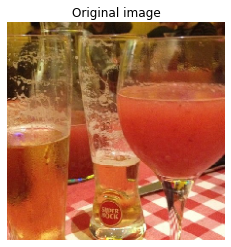

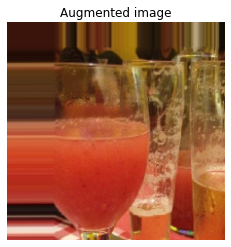

In [ ]:
# Show original image and augmented image
random_number = random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

Let's shuffle our augmented training data and train another model(the same as before) on it and see what happens 

In [ ]:
# Create the model
model_6 = tf.keras.Sequential([
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu,input_shape = (224,224,3)),
        MaxPool2D(2),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        MaxPool2D(),
        tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
        MaxPool2D(),
        Flatten(),
        tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)

])

# Compile the model
model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 487ms/step - loss: 0.7284 - accuracy: 0.5232 - val_loss: 0.6801 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 22s 470ms/step - loss: 0.7043 - accuracy: 0.4054 - val_loss: 0.6597 - val_accuracy: 0.6640
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6824 - accuracy: 0.5566 - val_loss: 0.5894 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 22s 460ms/step - loss: 0.6370 - accuracy: 0.6616 - val_loss: 0.5097 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 22s 467ms/step - loss: 0.5773 - accuracy: 0.7281 - val_loss: 0.4895 - val_accuracy: 0.7840


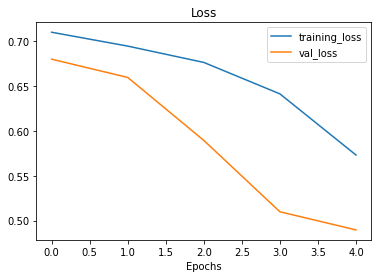

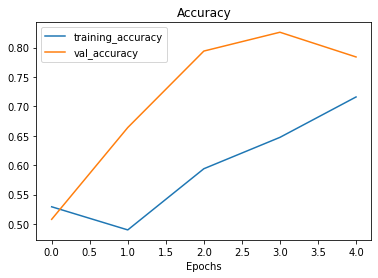

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curve(history_6)

Let's shuffle our augmented data and train another model(the same as before) on it and see what happens 

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                           target_size = (224,224),
                                                                           batch_size = 32,
                                                                           class_mode = 'binary',
                                                                           shuffle = True)



Found 1500 images belonging to 2 classes.


In [ ]:
model_7 = tf.keras.Sequential([
             tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu,input_shape = (224,224,3)),
             MaxPool2D(),
             tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
             MaxPool2D(),
             tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
             MaxPool2D(),
             Flatten(),
             tf.keras.layers.Dense(1,activation = tf.keras.activations.sigmoid)
]) 

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented_shuffle),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 491ms/step - loss: 0.6648 - accuracy: 0.5801 - val_loss: 0.5007 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 23s 482ms/step - loss: 0.5159 - accuracy: 0.7485 - val_loss: 0.4389 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 24s 502ms/step - loss: 0.4756 - accuracy: 0.7620 - val_loss: 0.3960 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 23s 499ms/step - loss: 0.4967 - accuracy: 0.7777 - val_loss: 0.3503 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 23s 484ms/step - loss: 0.4695 - accuracy: 0.7720 - val_loss: 0.3183 - val_accuracy: 0.8640


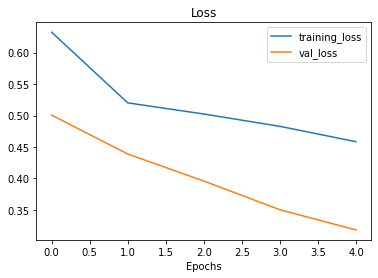

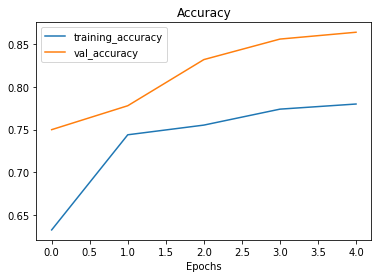

In [ ]:
plot_loss_curve(history_7)

🔑 **Note**: When shuffling the traing data the model get exposed to all different kind of data during training thus enabling it to learn the features across a wide array of images (in our case pizza &steak at the same time instead of just pizza then steak)

# 7.Repeat until satisified
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case

# Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-05-14 19:10:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2021-05-14 19:10:07 (20.7 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

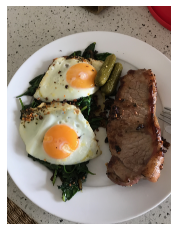

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

🔑 **Note**: For your model to make predictions on unseen data, for example, your own custom images, the custom image has to be in the same shape as your model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that your model has been trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model

def load_and_prep_image(filename,img_shape = 224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img,[img_shape,img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
preds = model_7.predict(tf.expand_dims(steak,axis = 0))
preds

array([[0.8415586]], dtype=float32)

Looks like our custom image is put through our model however it currently outputs our prediction probability,wouldn't it be nice if we could visulize the image as well as the predition

In [ ]:
# Let's remind our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(preds))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model,filename,class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))
  # Get the predicted class
  pred_class = class_names[int (tf.round(pred))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

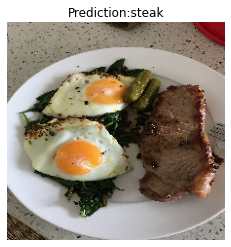

In [ ]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg", class_names)

--2021-05-14 19:10:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2021-05-14 19:10:09 (36.0 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]



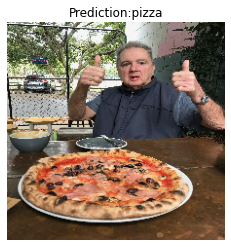

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multi-class Classification

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

# 1.Import and become one with the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-05-14 19:25:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   186MB/s    in 2.7s    

2021-05-14 19:25:45 (186 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import numpy as np
import pathlib

data_dir = pathlib.Path(train_dir) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # created a list of class_names from the subdirectories
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape (343, 512, 3)


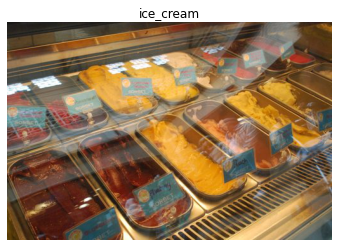

In [ ]:
# View a random image from the training dataset
import random

img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names)) 

# 2.Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#  3.Create a model (start with a baseline)
we have been talking a lot about the CNN explainer website.. how about we just take their model (also on 10 different classes) and use it for our problem...

In [ ]:
import tensorflow as tf

model_8 = tf.keras.Sequential([
     tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu,input_shape = (224,224,3)),
     tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
     MaxPool2D(),
     tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
     tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
     MaxPool2D(),
     Flatten(),
     tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

model_8.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])


# 4.Fit a model

In [ ]:
history_8 = model_8.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 187ms/step - loss: 2.2309 - accuracy: 0.1669 - val_loss: 1.9560 - val_accuracy: 0.3028
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8663 - accuracy: 0.3571 - val_loss: 1.9569 - val_accuracy: 0.3144
Epoch 3/5
235/235 [==============================] - 43s 184ms/step - loss: 1.4571 - accuracy: 0.5024 - val_loss: 2.0613 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.7768 - accuracy: 0.7586 - val_loss: 2.4785 - val_accuracy: 0.2944
Epoch 5/5
235/235 [==============================] - 43s 183ms/step - loss: 0.2761 - accuracy: 0.9215 - val_loss: 3.7238 - val_accuracy: 0.2816


# 5.Evaluate the model

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 3.7238 - accuracy: 0.2816


[3.723832130432129, 0.2815999984741211]

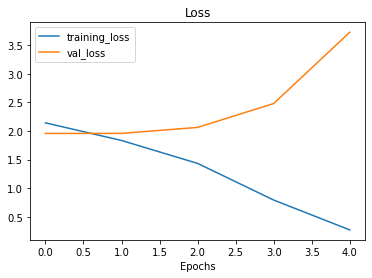

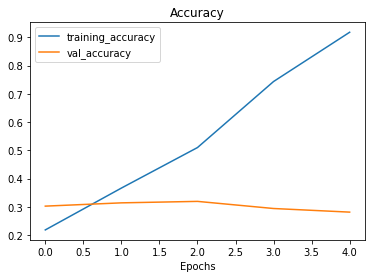

In [ ]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curve(history_8)

It seems our model is **overfitting** the training set quite badly. In other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

# 6.Adjust the model parameters(to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something.

 However, performing well on the training data is like going well in the classroom but failing to use your skills in real life.

 o our next steps will be to try and prevent our model overfitting. A couple of ways to prevent overfitting include:

* **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

* **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

* **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

* **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.


In [ ]:
# Try a simplified model (removed two layers)
model_9 = tf.keras.Sequential([
      tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
      MaxPool2D(),
      tf.keras.layers.Conv2D(10,3,activation = tf.keras.activations.relu),
      MaxPool2D(),
      Flatten(),
      tf.keras.layers.Dense(10,activation = tf.keras.activations.softmax)
])

model_9.compile(loss = tf.keras.losses.categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_9 = model_9.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 179ms/step - loss: 2.8825 - accuracy: 0.1692 - val_loss: 1.9478 - val_accuracy: 0.3212
Epoch 2/5
235/235 [==============================] - 42s 177ms/step - loss: 1.8125 - accuracy: 0.3841 - val_loss: 1.8726 - val_accuracy: 0.3324
Epoch 3/5
235/235 [==============================] - 42s 177ms/step - loss: 1.4496 - accuracy: 0.5309 - val_loss: 2.0192 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 42s 178ms/step - loss: 1.0447 - accuracy: 0.6736 - val_loss: 2.3387 - val_accuracy: 0.3036
Epoch 5/5
235/235 [==============================] - 41s 175ms/step - loss: 0.6558 - accuracy: 0.8118 - val_loss: 2.6081 - val_accuracy: 0.3060


In [ ]:
model_9.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, None, None, 10)    280       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, None, None, 10)    910       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, None, None, 10)    0         
_________________________________________________________________
flatten_21 (Flatten)         (None, None)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

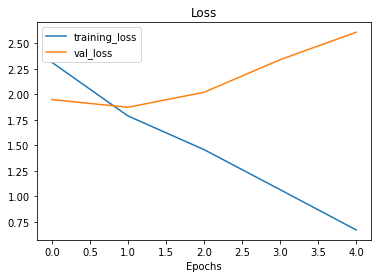

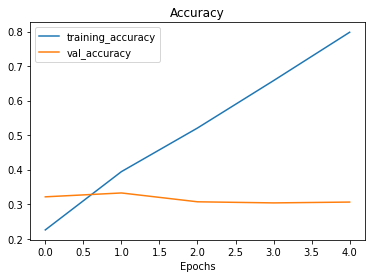

In [ ]:
# Check out the loss curves of model_9
plot_loss_curve(history_9)

Looks like our simplifying the model doen't work the accuracy went down and overfitting continued

How about we try data augmentation

# Trying to reduce overfitting with augmentation

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224,224),
                                                                   batch_size = 32,
                                                                   class_mode = 'categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
# Clone the model (use the same architecture)
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (same setup as used for model_10)
model_10.compile(loss= tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 108s 458ms/step - loss: 2.3008 - accuracy: 0.1493 - val_loss: 2.0452 - val_accuracy: 0.2740
Epoch 2/5
235/235 [==============================] - 108s 458ms/step - loss: 2.0958 - accuracy: 0.2522 - val_loss: 1.9593 - val_accuracy: 0.3048
Epoch 3/5
235/235 [==============================] - 107s 456ms/step - loss: 2.0422 - accuracy: 0.2646 - val_loss: 1.9071 - val_accuracy: 0.3520
Epoch 4/5
235/235 [==============================] - 107s 456ms/step - loss: 1.9944 - accuracy: 0.3028 - val_loss: 1.8351 - val_accuracy: 0.3724
Epoch 5/5
235/235 [==============================] - 107s 457ms/step - loss: 1.9565 - accuracy: 0.3219 - val_loss: 1.8073 - val_accuracy: 0.3696


In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 10s 128ms/step - loss: 3.7238 - accuracy: 0.2816


[3.7238311767578125, 0.2815999984741211]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8073 - accuracy: 0.3696


[1.8072601556777954, 0.36959999799728394]

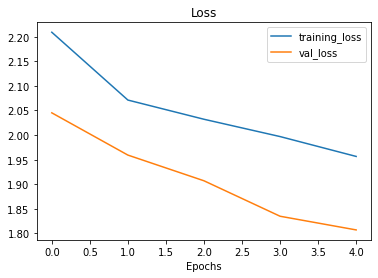

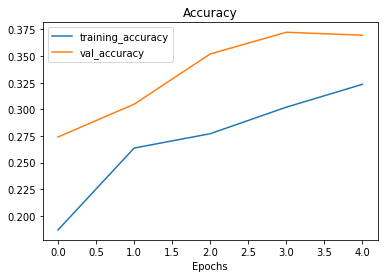

In [ ]:
# Check out our model's performance with augmented data
plot_loss_curve(history_10)

# 7.Repeat until satisfied
we could keep going here.. continually trying to bring our loss curves closer together and trying to imrove our validation and accuracy

How?
By running lots of experiment nately:

* restructing our model architecture(increasing layer/hidden units)
* adjusting learning rate
* trying different methods of data augmentation(adjusting our hyperparametrs in our ImageDataGenerator instance)
* train forlonger(eg 10 epochs instead of 5)
* Try **transfer learning**

# Making a prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [ ]:
def pred_and_plot_2(model,filename,class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img,axis = 0))
  # Add in logic for multiclass and get pred_class_names
  if len(pred[0] > 1):
    pred_class = class_names[tf.argmax(pred[0])]
  else:
  # Get the predicted class
    pred_class = class_names[int (tf.round(pred[0]))]
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction:{pred_class}")
  plt.axis(False)

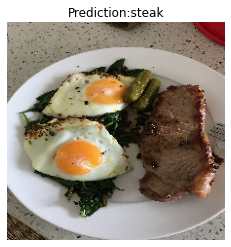

In [ ]:
# Make a prediction using model_11
pred_and_plot_2(model=model_10, 
              filename="03-steak.jpeg", 
              class_names=class_names)

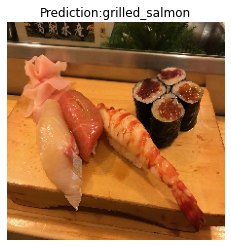

In [ ]:
pred_and_plot_2(model_10, "03-sushi.jpeg", class_names)

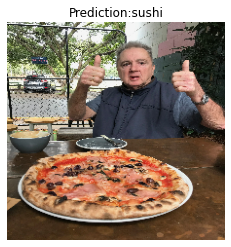

In [ ]:
pred_and_plot_2(model_10, "03-pizza-dad.jpeg", class_names)

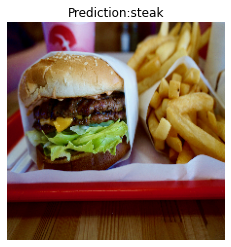

In [ ]:
pred_and_plot_2(model_10, "03-hamburger.jpeg", class_names)

Looks like our model didn't perform well on our custom images but this is because it only achieved 35% accuracy on test data so we can expect it to function poorly on other unseen data

# Saving and loading our model

In [ ]:
# Save a model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
# Load in a model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 132ms/step - loss: 1.8073 - accuracy: 0.3696


[1.807260513305664, 0.36959999799728394]